In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Internet Speed.csv')
print(df.head())

   Ping_latency  Download_speed  Upload_speed  Packet_loss_rate  \
0     21.854305       42.395374     19.934759          0.999340   
1     47.782144       49.976388     17.979781          1.493494   
2     37.939727       86.182002     10.455388          1.125334   
3     31.939632       37.300417     31.148800          0.166605   
4     12.020839       87.616720     24.877960          0.371160   

   Router_distance  Network_congestion  ISP_quality  Connection_type_DSL  \
0         7.569985            1.369483     7.467012             0.000000   
1         2.660608            1.243015     6.215047             2.373401   
2         4.119757            3.416768     9.751490             1.509861   
3         6.969526            4.864465     4.532849             0.000000   
4         5.338804            3.010885     7.114995             1.241954   

   Connection_type_Cable  Connection_type_Fiber  Signal_strength  \
0                    0.0               0.000000        76.190258   
1   

In [5]:
df.describe()

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.357440,51.691277,26.066003,1.015369,5.578994,2.965295,6.504300,1.272947,1.256751,1.273640,84.948302,2.499880,1257.296163
std,13.033514,27.133568,13.956951,0.575612,2.598671,1.138216,2.018279,1.637940,1.625825,1.631132,8.609663,1.438197,927.617450
min,5.000524,5.005019,2.007572,0.000505,1.000433,1.000441,3.000039,0.000000,0.000000,0.000000,70.001406,0.003471,80.606669
25%,15.973826,28.478861,13.864032,0.525459,3.330062,1.988582,4.732669,0.000000,0.000000,0.000000,77.742714,1.244065,430.808067
50%,27.500388,51.167300,25.817462,1.024899,5.620063,2.963910,6.513309,0.032340,0.002561,0.031585,84.822169,2.511349,1018.976847
75%,38.664539,74.670302,38.509712,1.502211,7.819270,3.928608,8.237586,2.537834,2.507974,2.547957,92.345908,3.771796,1951.295923
max,49.987295,99.952993,49.990647,1.999850,9.999109,4.998928,9.998526,4.999453,4.999785,4.998248,99.998191,4.998094,3364.871190


In [7]:
df = df.select_dtypes(include=[np.number])

In [9]:
df = df.dropna()

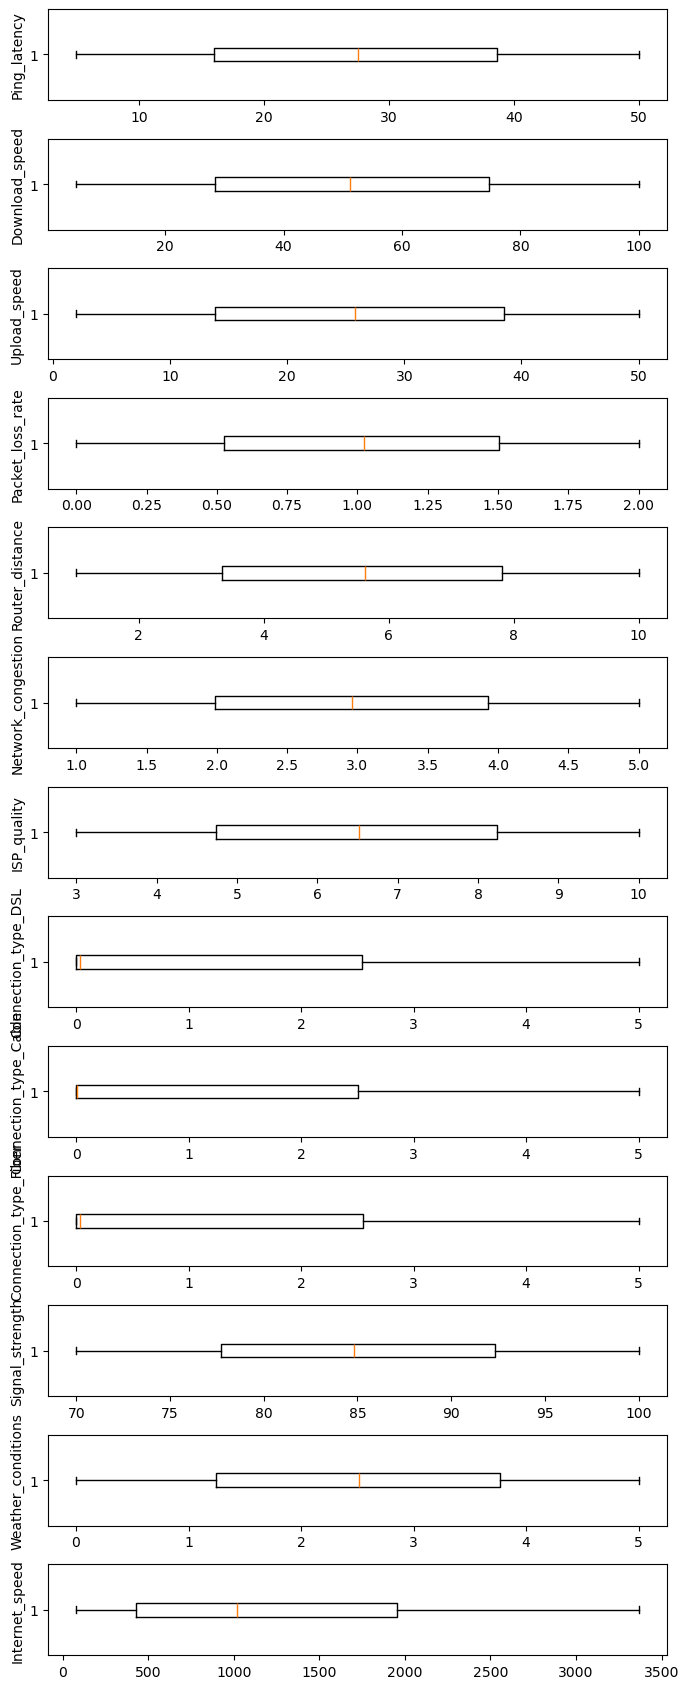

In [13]:
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(7, 17))
if len(df.columns) == 1:
    axs = [axs]
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [15]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_out
df = df.select_dtypes(include=[np.number])
df_cleaned = remove_outliers(df)
print(df_cleaned)

      Ping_latency  Download_speed  Upload_speed  Packet_loss_rate  \
0        21.854305       42.395374     19.934759          0.999340   
1        47.782144       49.976388     17.979781          1.493494   
2        37.939727       86.182002     10.455388          1.125334   
3        31.939632       37.300417     31.148800          0.166605   
4        12.020839       87.616720     24.877960          0.371160   
...            ...             ...           ...               ...   
4995     45.382879       86.477319     33.242407          1.754077   
4996     10.372146       90.263339     10.534320          0.093628   
4997     19.752928       94.937252      4.459498          0.607397   
4998     41.708542       42.761359     34.782156          0.886640   
4999     31.879057       25.628338     14.051793          0.344530   

      Router_distance  Network_congestion  ISP_quality  Connection_type_DSL  \
0            7.569985            1.369483     7.467012             0.000000   
1

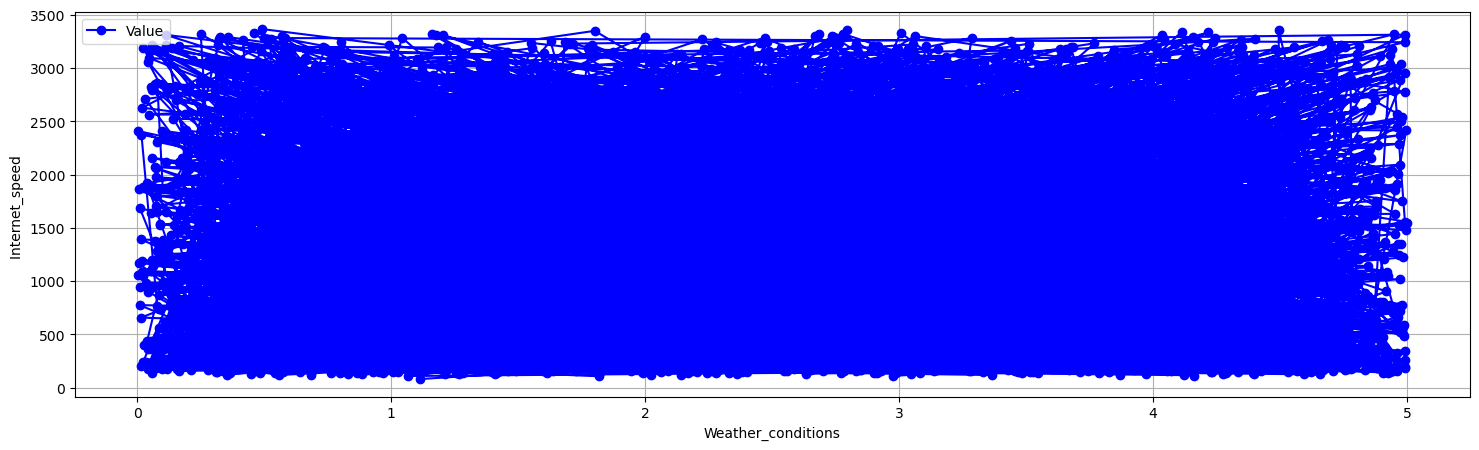

In [41]:
plt.figure(figsize=(18, 5))
plt.plot(df['Weather_conditions'], df['Internet_speed'], marker='o', linestyle='-', color='b', label='Value')
plt.xlabel('Weather_conditions')
plt.ylabel('Internet_speed ')
plt.legend()
plt.grid(True)
plt.show()

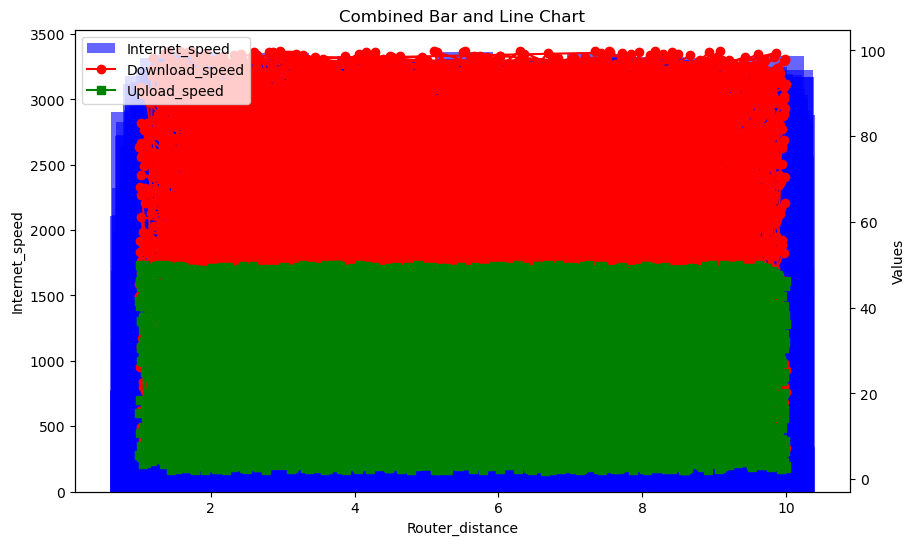

In [49]:
category_column = 'Router_distance'
value1_column = 'Internet_speed'
value2_column = 'Download_speed'
value3_column = 'Upload_speed'

assert category_column in df.columns, f"Column '{category_column}' not found in DataFrame."
assert value1_column in df.columns, f"Column '{value1_column}' not found in DataFrame."
assert value2_column in df.columns, f"Column '{value2_column}' not found in DataFrame."
assert value3_column in df.columns, f"Column '{value3_column}' not found in DataFrame."

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Value1
ax1.bar(df[category_column], df[value1_column], color='b', alpha=0.6, label=value1_column)

# Create a second y-axis for the line charts
ax2 = ax1.twinx()

# Line chart for Value2
ax2.plot(df[category_column], df[value2_column], color='r', marker='o', linestyle='-', label=value2_column)

# Line chart for Value3
ax2.plot(df[category_column], df[value3_column], color='g', marker='s', linestyle='-', label=value3_column)

# Set the labels and title
ax1.set_xlabel(category_column)
ax1.set_ylabel(value1_column)
ax2.set_ylabel('Values')
plt.title('Combined Bar and Line Chart')

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Display the plot
plt.show()